# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Contours
The contour is continuous, the edges are not all continuous.

Finding contours is for white objects. Make sure that the object is white and the background is black. Otherwise, many people will find the outermost frame of the picture when looking for the contour. 

### cv2.findContours()
- image
- mode : contour retrieval mode, see #RetrievalModes
- method : contour approximation method, see #ContourApproximationModes
- offset : optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

In [238]:
img = cv.imread('handwriting.jpg', 0)
ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

contours, hierarchy = cv.findContours(thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

4


### Contour Hierarchy
hierarchy = [Next, Previous, First Child, Parent]

When we found the contours in image using cv.findContours() function, we have passed an argument, Contour Retrieval Mode. We usually passed cv.RETR_LIST or cv.RETR_TREE and it worked nice.

Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc. Representation of this relationship is called the Hierarchy.

### cv2.drawContours()
- image
- contours
- contourIdx : parameter indicating a contour to draw, if negative, all the contours are drawn
- color : color of the contours
- thickness : thickness of lines the contours are drawn with. If negative, the contour interiors are drawn

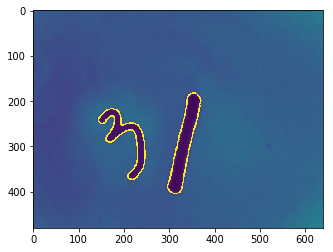

In [217]:
drawimg = cv.drawContours(img, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)
plt.imshow(drawimg)

In [245]:
all_img = []
for i in range(4):
    img = cv.imread('handwriting.jpg', 0)
    ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[i]
    cimg = cv.drawContours(img, [cnt], 0, (255, 0, 0), 2)
    all_img.append(cimg)

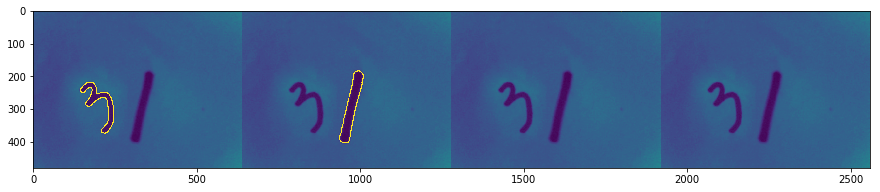

In [247]:
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack(tuple(all_img)))

## Contour Features
To find the different features of contours, like area, perimeter, centroid, bounding box etc.

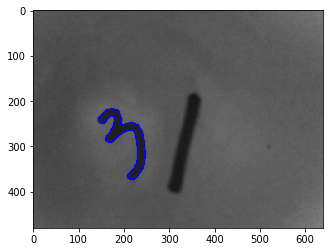

In [265]:
img = cv.imread('handwriting.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, mode=3, method=2)

# select number 3
cnt = contours[0]

img_color1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_color2 = np.copy(img_color1)
plt.imshow(cv.drawContours(img_color1, [cnt], 0, (0, 0, 255), 2))

In [266]:
area = cv.contourArea(cnt)
area

4386.5

In [267]:
cv.countNonZero(img)

307200

In [268]:
# True indicates that the contour is closed 
perimeter = cv.arcLength(cnt, True)(x, y), radius = cv2.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius))  # 圆心和半径取整
cv2.circle(img_color2, (x, y), radius, (0, 0, 255), 2)
perimeter

585.7716410160065

In [269]:
M = cv.moments(cnt)

In [270]:
# area
M['m00']

4386.5

### Bounding rectangle 
- blue : contours
- red : min area
- green : bounding

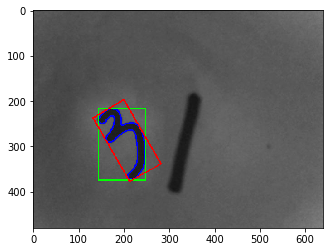

In [264]:
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img_color1, (x, y), (x + w, y + h), (0, 255, 0), 2)

rect = cv.minAreaRect(cnt) 
box = np.int0(cv.boxPoints(rect)) # float to int

res = cv.drawContours(img_color1, [box], 0, (255, 0, 0), 2)

plt.imshow(res)

### Minimum Enclosing circle 

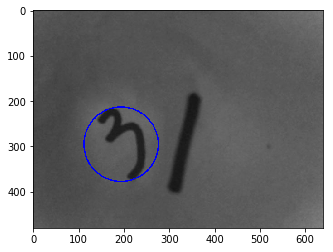

In [272]:
(x, y), radius = cv.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius))
plt.imshow(cv.circle(img_color2, (x, y), radius, (0, 0, 255), 2))

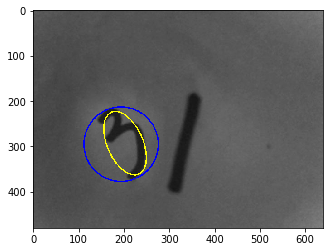

In [277]:
ellipse = cv.fitEllipse(cnt)
plt.imshow(cv.ellipse(img_color2, ellipse, (255, 255, 0), 2))

### Match Shapes

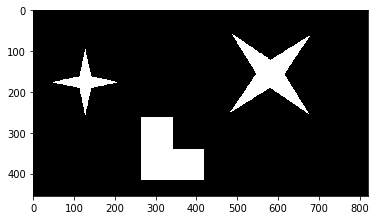

In [281]:
img = cv.imread('shapes.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, 3, 2)
img_color = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)
plt.imshow(img_color)

In [282]:
cnt_a, cnt_b, cnt_c = contours[0], contours[1], contours[2]
print(cv.matchShapes(cnt_b, cnt_b, 1, 0.0))  # 0.0
print(cv.matchShapes(cnt_b, cnt_c, 1, 0.0))  # 2.17e-05
print(cv.matchShapes(cnt_b, cnt_a, 1, 0.0))  # 0.418

0.0
2.176955476018705e-05
0.4181711500194456


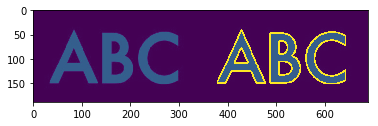

In [291]:
img = cv.imread('abc.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, 3, 2)

img2 = np.copy(img)
img2 = cv.drawContours(img2, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)

b, c, a = contours[0], contours[3], contours[4]

bimg = cv.drawContours(np.copy(img), b, contourIdx=-1, color=(255, 0, 0), thickness=2)
cimg = cv.drawContours(np.copy(img), c, contourIdx=-1, color=(255, 0, 0), thickness=2)
aimg = cv.drawContours(np.copy(img), a, contourIdx=-1, color=(255, 0, 0), thickness=2)

plt.imshow(np.hstack((img, img2)))

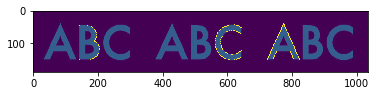

In [292]:
plt.imshow(np.hstack((bimg, cimg, aimg)))

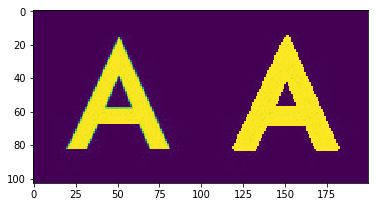

In [289]:
img_a = cv.imread('template_a.jpg', 0)
_, th = cv.threshold(img_a, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(th, 3, 2)


imga2 = np.copy(img_a)
imga2 = cv.drawContours(imga2, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)

plt.imshow(np.hstack((img_a, imga2)))

template_a = contours[0]

In [293]:
print(cv.matchShapes(a, template_a, 1, 0.0))  # 0.02557(最相似)
print(cv.matchShapes(b, template_a, 1, 0.0))  # 0.80585
print(cv.matchShapes(c, template_a, 1, 0.0))  # 3.26050

0.02557032687410707
0.8058589058365455
3.260500788181953
